Problem statement - There are times when a user writes Good, Nice App or any other positive text, in the review and gives 1-star rating. Your goal is to identify the reviews where the semantics of review text does not match rating.

Your goal is to identify such ratings where review text is good, but rating is negative- so that the support team can point this to users.

# Machine Learning Based Approach- TextBlob

In [33]:
import pandas as pd
import numpy as np

In [34]:
reviews = pd.read_csv("chrome_reviews.csv")
reviews.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome


In [35]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7204 entries, 0 to 7203
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               7204 non-null   int64 
 1   Review URL       7204 non-null   object
 2   Text             7203 non-null   object
 3   Star             7204 non-null   int64 
 4   Thumbs Up        7204 non-null   int64 
 5   User Name        7204 non-null   object
 6   Developer Reply  95 non-null     object
 7   Version          7119 non-null   object
 8   Review Date      7204 non-null   object
 9   App ID           7204 non-null   object
dtypes: int64(3), object(7)
memory usage: 562.9+ KB


In [36]:
data= reviews[["Text","Star"]]
data.head()

,Text,Star
0,This is very helpfull aap.,5
1,Good,3
2,Not able to update. Neither able to uninstall.,1
3,Nice app,4
4,Many unwanted ads,1


In [37]:
data.isnull().sum()

Text    1
Star    0
dtype: int64

In [38]:
data.dropna()

,Text,Star
0,This is very helpfull aap.,5
1,Good,3
2,Not able to update. Neither able to uninstall.,1
3,Nice app,4
4,Many unwanted ads,1
...,...,...
7199,Bagusss..,5
7200,Bad version 😔,1
7201,One thing that I have to say I can't spelled t...,5
7202,Excellent,5


In [39]:
import nltk
import re
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ajay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
ps=PorterStemmer()
def clean_text(text):
    text=re.sub('[^a-zA-Z]', " ", text)
    text=text.lower()
    text=text.split()
    text=[ps.stem(word)for word in text if word not in stopwords.words('english')]
    text=' '.join(text)
    return text
clean = lambda x: clean_text(str(x))

In [41]:
data['Text'] = data['Text'].apply(clean)

C:\Users\Ajay\AppData\Local\Temp\ipykernel_26284\2408581645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Text'] = data['Text'].apply(clean)


In [42]:
data.head()

,Text,Star
0,helpful aap,5
1,good,3
2,abl updat neither abl uninstal,1
3,nice app,4
4,mani unwant ad,1


In [43]:
data["Length"] = data["Text"].apply(lambda x:len(str(x)))
data.head()

C:\Users\Ajay\AppData\Local\Temp\ipykernel_26284\2553786513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Length"] = data["Text"].apply(lambda x:len(str(x)))


,Text,Star,Length
0,helpful aap,5,11
1,good,3,4
2,abl updat neither abl uninstal,1,30
3,nice app,4,8
4,mani unwant ad,1,14


In [44]:
from textblob import TextBlob
def get_polarity(review):
    return TextBlob(review).sentiment.polarity

In [45]:
data['TextBlob_polarity']=data['Text'].apply(get_polarity)

C:\Users\Ajay\AppData\Local\Temp\ipykernel_26284\695202703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TextBlob_polarity']=data['Text'].apply(get_polarity)


In [46]:
data

,Text,Star,Length,TextBlob_polarity
0,helpful aap,5,11,0.00
1,good,3,4,0.70
2,abl updat neither abl uninstal,1,30,0.00
3,nice app,4,8,0.60
4,mani unwant ad,1,14,0.00
...,...,...,...,...
7199,bagusss,5,7,0.00
7200,bad version,1,11,-0.70
7201,one thing say spell good problem tri spell best,5,47,0.85
7202,excel,5,5,0.00


In [47]:
data.drop(data.columns[-1],axis=1)

,Text,Star,Length
0,helpful aap,5,11
1,good,3,4
2,abl updat neither abl uninstal,1,30
3,nice app,4,8
4,mani unwant ad,1,14
...,...,...,...
7199,bagusss,5,7
7200,bad version,1,11
7201,one thing say spell good problem tri spell best,5,47
7202,excel,5,5


In [48]:
def get_Analysis(score):
    if score < 0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    

In [49]:
data['TextBlob_Analysis']= data['TextBlob_polarity'].apply(get_Analysis)
data

C:\Users\Ajay\AppData\Local\Temp\ipykernel_26284\894842944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TextBlob_Analysis']= data['TextBlob_polarity'].apply(get_Analysis)


,Text,Star,Length,TextBlob_polarity,TextBlob_Analysis
0,helpful aap,5,11,0.00,Neutral
1,good,3,4,0.70,Positive
2,abl updat neither abl uninstal,1,30,0.00,Neutral
3,nice app,4,8,0.60,Positive
4,mani unwant ad,1,14,0.00,Neutral
...,...,...,...,...,...
7199,bagusss,5,7,0.00,Neutral
7200,bad version,1,11,-0.70,Negative
7201,one thing say spell good problem tri spell best,5,47,0.85,Positive
7202,excel,5,5,0.00,Neutral


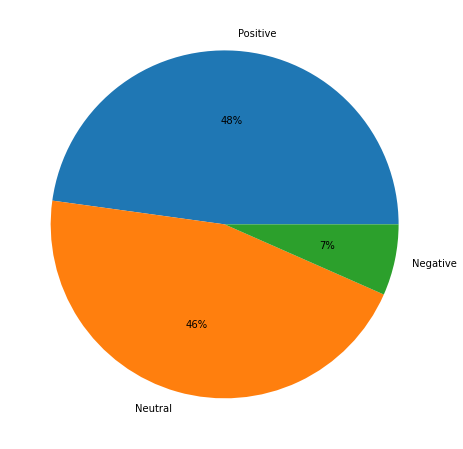

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.pie(data["TextBlob_Analysis"].value_counts(), labels = data["TextBlob_Analysis"].value_counts().index, autopct="%.0f%%")
plt.show()

In [51]:
positive_review = data[(data.TextBlob_Analysis == "Positive")]
positive_review.head()

,Text,Star,Length,TextBlob_polarity,TextBlob_Analysis
1,good,3,4,0.7,Positive
3,nice app,4,8,0.6,Positive
5,app good,4,8,0.7,Positive
10,good,5,4,0.7,Positive
11,good app,5,8,0.7,Positive


In [52]:
insights = []
for row in positive_review["Star"] :
    if row >= 3 :
         insights.append("No Attention Needed")
    else :
         insights.append("Attention Needed")

In [53]:
positive_review["Result"] = insights
positive_review.head()

C:\Users\Ajay\AppData\Local\Temp\ipykernel_26284\3431191569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_review["Result"] = insights


,Text,Star,Length,TextBlob_polarity,TextBlob_Analysis,Result
1,good,3,4,0.7,Positive,No Attention Needed
3,nice app,4,8,0.6,Positive,No Attention Needed
5,app good,4,8,0.7,Positive,No Attention Needed
10,good,5,4,0.7,Positive,No Attention Needed
11,good app,5,8,0.7,Positive,No Attention Needed


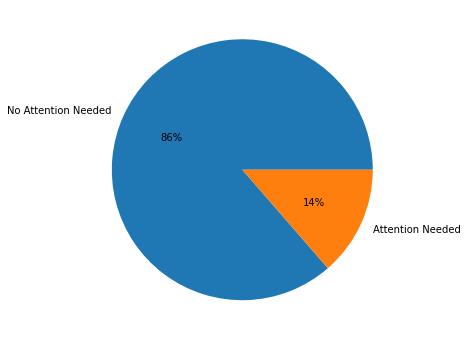

In [54]:
plt.figure(figsize=(8,6))
plt.pie(positive_review["Result"].value_counts(), labels = positive_review["Result"].value_counts().index, autopct="%.0f%%")
plt.show()